<b>Задача о снижении размерности</b>
Вот корпус, однажды собранный без особенных размышлений. Это -- корпус любительской литературы. Он был собран для забавы и непонятно, какая природа у представленных там текстов.

<b>Задача</b>: взяв фанифики и два каких-то других жанра из корпуса, визуализировать их BoW-представления на плоскости.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install pymorphy2

In [ ]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
import pandas as pd

In [ ]:
from tqdm import tqdm

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('russian'))
#удаляем все символы, лемматизируем
def preprocess(rawtext):
    ans = ''
    for char in rawtext:
        if char.isalpha() or char == ' ':
            ans += char
        else:
            ans += ' '
    words = ans.split(" ")
    w = []
    for i in words:
        if i != '':
            p = morph.parse(i.lower())[0].normal_form
            if p not in stop_words:
                w.append(p)
    return " ".join(w)

In [ ]:
directory = "/content/drive/My Drive/corporas"
path_list = []
for root, dirs, files in os.walk(directory):
    for season in dirs:
        season_path = root + "/" + season
        c = 0
        for file_path in os.listdir(season_path):
            if file_path.endswith('.txt') and c<300:
                c+=1
                path_list += [season_path + "/" + file_path]


In [ ]:
morph = MorphAnalyzer()
corpora_list = []
corpus = []
#беру по 150 текстов каждого корпуса
for path in tqdm(range(0,len(path_list), 2)):
    path = path_list[path]
    with open(path, "r", encoding="utf-8") as t:
        raw = t.read()
        processed = preprocess(raw)
        corpus.append(processed)
        corpus_idx = path.split('/')[-2]
        corpora_list.append(corpus_idx)

In [ ]:
vectorizer = TfidfVectorizer(min_df=10, max_df=0.5, max_features=10000)
X = vectorizer.fit_transform(corpus)

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.todense())
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [ ]:
targets = pd.DataFrame(corpora_list, columns=['targets'])
finalDf = pd.concat([principalDf, targets], axis = 1)

In [ ]:
finalDf.head(5)

,pc1,pc2,targets
0,0.194264,-0.051601,Религия
1,0.288764,-0.005128,Религия
2,0.116313,0.000103,Религия
3,0.121192,0.035688,Религия
4,0.137081,0.038457,Религия


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2).fit_transform(PCA(n_components=10).fit_transform(X.todense()))
principalDf2 = pd.DataFrame(data = tsne, columns = ['pc1', 'pc2'])
finalDf2 = pd.concat([principalDf2, targets], axis = 1)
finalDf2.head(5)

,pc1,pc2,targets
0,18.855181,-11.331859,Религия
1,9.415609,-22.297096,Религия
2,8.230127,-11.257528,Религия
3,3.777942,-6.421839,Религия
4,5.871058,-7.473136,Религия


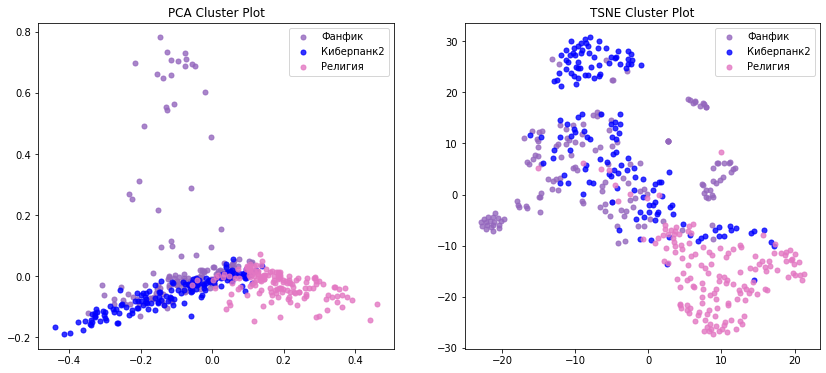

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
tar = ['Фанфик', 'Киберпанк2', 'Религия']
colors = ['tab:purple', 'b', 'tab:pink']
for target, color in zip(tar,colors):
    indicesToKeep = finalDf['targets'] == target
    ax[0].scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 25
               , alpha=0.8)
    ax[1].scatter(finalDf2.loc[indicesToKeep, 'pc1']
               , finalDf2.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 25
               , alpha=0.8)
    
ax[0].set_title('PCA Cluster Plot')
ax[0].legend(tar)   
ax[1].set_title('TSNE Cluster Plot')
ax[1].legend(tar)

###Методом LDA выделите несколько тем в переписке Х. Клинтон, дайте им словесное описание. Используйте библиотеку LdaModel из gensim.

###Критерии
#####2 БАЛЛА: получены списки ключевых слов, не выглядящие бессмыслицей
#####2 БАЛЛА: осуществлена визуализация библиотекой pyLDAvis
#####1 БАЛЛ: предложено осмысленное текстовое описание большинства выделенных тем.
#####1 БАЛЛ: проведено сравнение LDA, запущенного на CountVectorizer и TfIdfVectorizer предтавлениях одних и тех же данных.

In [ ]:
import pandas as pd
data_mail = pd.read_csv('/content/drive/My Drive/Emails.csv', header=0)
data_mail.head(5)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,ExtractedSubject,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296,FW: Wow,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296,Re: Chris Stevens,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,HRC_Email_296,FVV: Cairo Condemnation - Final,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#попытка отфильтровать всякие имена людей, с которыми Хиллари переписывается
names = data_mail[pd.notnull(data_mail['MetadataFrom'])]
answer = []
for i in names['MetadataFrom']:
    ans = ''
    for char in i:
        if char.isalpha() or char == ' ':
            ans += char
        else:
            ans += ' '
    words = nltk.word_tokenize(ans)
    for w in words:
        answer.append(w.lower())
answer = set(answer)

In [ ]:
data = data_mail[pd.notnull(data_mail['ExtractedBodyText'])]

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.update(['gov', 'clintonemail', 'september', 'february', 'march', 'october',
                   'january', 'december', 'june', 'saturday', 'tuesday', 'friday',
                   'monday', 'wednesday', 'thursday', 'august', 'april'])
stop_words.update(answer)
# функция препроцессинга
def preprocess2(rawtext):
    ans = ''
    for char in rawtext:
        if char.isalpha() or char == ' ':
            ans += char
        else:
            ans += ' '
    words = nltk.word_tokenize(ans)
    answer = []
    for w in words:
        w = lemmatizer.lemmatize(w.lower())
        if w not in stop_words and len(w)>2:
            answer.append(w.lower())
    
    return ' '.join(answer)

In [ ]:
def preprocess3(rawtext):
    ans = ''
    for char in rawtext:
        if char.isalpha() or char == ' ':
            ans += char
        else:
            ans += ' '
    words = nltk.word_tokenize(ans)
    answer = []
    for w in words:
        w = lemmatizer.lemmatize(w.lower())
        if w not in stop_words and len(w)>2:
            answer.append(w.lower())
    
    return answer

In [ ]:
from gensim import corpora,models, matutils
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.ldamodel import LdaModel
vectorizer = TfidfVectorizer()
data["Clean"] = data["ExtractedBodyText"].apply(lambda x: preprocess2(x))
data["Clean_list"] = data["ExtractedBodyText"].apply(lambda x: preprocess3(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(data.sample(5)["Clean"])

5805    rage day rage noxious transformation conservat...
3693    fyi ended sending letter afternoon staff diffi...
4680                                        agreed worked
3421    yes sorry late response driving thanksgiving t...
4478                                           think fine
Name: Clean, dtype: object


In [ ]:
dictionary_tfidf = corpora.Dictionary(data["Clean_list"])
dictionary_tfidf.filter_extremes(no_below=5, no_above=0.5)

In [ ]:
bow_dict = [dictionary_tfidf.doc2bow(doc) for doc in data["Clean_list"]]
tfidf = models.TfidfModel(bow_dict)
corpus_tfidf = tfidf[bow_dict]

In [ ]:
from gensim import matutils
from gensim.models.ldamodel import LdaModel
model_lda = LdaModel(corpus_tfidf, passes=10,iterations = 100, num_topics=10, alpha='auto', id2word=dictionary_tfidf)
topics_to_str = [word for number, word in model_lda.print_topics()]
topics_to_str_split = list(map(lambda x: x.split("+"), topics_to_str))
topics_to_str_split  = [list(map(lambda x: x.split("*")[1].strip()[1:-1], elem)) for elem in topics_to_str_split]
for topic in topics_to_str_split :
    print(topic)

['calling', 'landed', 'happening', 'libya', 'benghazi', 'supposed', 'printing', 'isabelle', 'mini', 'track']
['jpg', 'scroll', 'updated', 'berry', 'glad', 'leaving', 'goy', 'wow', 'updating', 'mubarak']
['discus', 'said', 'tonight', 'say', 'message', 'add', 'statement', 'issue', 'first', 'woman']
['release', 'part', 'declassify', 'nice', 'fax', 'roger', 'reason', 'wireless', 'rob', 'blackberry']
['call', 'see', 'thx', 'yes', 'talk', 'get', 'tomorrow', 'pls', 'know', 'today']
['office', 'room', 'high', 'importance', 'department', 'arrive', 'route', 'depart', 'treaty', 'private']
['print', 'pls', 'assistant', 'please', 'dan', 'special', 'confidential', 'add', 'emailed', 'direct']
['sound', 'traffic', 'blackberry', 'reaction', 'bottom', 'via', 'share', 'mail', 'non', 'heading']
['fyi', 'iii', 'forwarded', 'remind', 'attached', 'correct', 'reminder', 'passed', 'raj', 'fuchsmh']
['checking', 'seen', 'sometime', 'offer', 'mark', 'mexico', 'bring', 'tonite', 'chair', 'front']


##Интерпретация результатов с tf-idf
Топики получились достаточно слабо выраженные, но можно заметить 
* ['call', 'see', 'thx', 'yes', 'talk', 'get', 'tomorrow', 'pls', 'know', 
'today'] - скорее всего неформальные письма кому-то близкому, 
* ['discus', 'said', 'tonight', 'say', 'message', 'add', 'statement', 'issue', 'first', 'woman'] - возможно какие-то обсуждения statemens, которые давала Хиллари по вопросам женщин, пресс релизов??
* ['office', 'room', 'high', 'importance', 'department', 'arrive', 'route', 'depart', 'treaty', 'private'] - обсуждения каких-то поездок, дат прибытия и отправки, 
* ['calling', 'landed', 'happening', 'libya', 'benghazi', 'supposed', 'printing', 'isabelle', 'mini', 'track'] - Судя по Ливии и Бенгази, речь идет об атаках 2012 года на дипломатические миссии США, в тот период Хиллари была гос секретарем
* ['print', 'pls', 'assistant', 'please', 'dan', 'special', 'confidential', 'add', 'emailed', 'direct'] возможно письма ассистентам с поручениями
* ['checking', 'seen', 'sometime', 'offer', 'mark', 'mexico', 'bring', 'tonite', 'chair', 'front'] - вопросы внешней политики?? там в визуализации видно больше слов для каждого кластера, и дальше есть еще Корея и Ирак
* с остальными топиками уже совсем сложно


In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim

data_lda = pyLDAvis.gensim.prepare(model_lda, corpus_tfidf, dictionary_tfidf)

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.display(data_lda)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10, max_df=0.5)
data_vectorized = vectorizer.fit_transform(data["Clean"])

In [ ]:
import gensim
from scipy.sparse import csc, csr_matrix
corpus_cv = matutils.Sparse2Corpus(data_vectorized.T,documents_columns=True)
vecdict=dict([(i, s) for i, s in enumerate(vectorizer.get_feature_names())])

In [ ]:
dictionary_cv = gensim.corpora.Dictionary.from_corpus(corpus_cv, vecdict)

In [ ]:
model_lda = LdaModel(corpus_cv, passes=20,iterations = 100, num_topics=10, alpha='auto', id2word=dictionary_cv)
topics_to_str = [word for number, word in model_lda.print_topics()]
topics_to_str_split = list(map(lambda x: x.split("+"), topics_to_str))
topics_to_str_split  = [list(map(lambda x: x.split("*")[1].strip()[1:-1], elem)) for elem in topics_to_str_split]
for topic in topics_to_str_split :
    print(topic)

['fyi', 'print', 'doc', 'date', 'subject', 'benghazi', 'information', 'sensitive', 'dept', 'produced']
['party', 'republican', 'vote', 'election', 'would', 'percent', 'democrat', 'said', 'conservative', 'voter']
['tomorrow', 'thx', 'yes', 'may', 'sunday', 'talk', 'today', 'morning', 'sent', 'time']
['government', 'security', 'united', 'would', 'people', 'effort', 'country', 'iran', 'force', 'support']
['obama', 'president', 'israel', 'israeli', 'said', 'policy', 'administration', 'palestinian', 'mcchrystal', 'time']
['one', 'say', 'year', 'day', 'people', 'time', 'like', 'said', 'woman', 'right']
['call', 'add', 'holbrooke', 'letter', 'pls', 'ops', 'list', 'called', 'want', 'send']
['office', 'meeting', 'room', 'department', 'arrive', 'route', 'depart', 'conference', 'private', 'residence']
['china', 'policy', 'health', 'development', 'economic', 'world', 'company', 'image', 'food', 'woman']
['see', 'know', 'get', 'think', 'good', 'would', 'also', 'want', 'work', 'need']


##Интерпретация lda с count vectorize
В целом результаты лучше,
* ['call', 'add', 'holbrooke', 'letter', 'pls', 'ops', 'list', 'called', 'want', 'send'] снова топик неформальной переписки
* ['tomorrow', 'thx', 'yes', 'may', 'sunday', 'talk', 'today', 'morning', 'sent', 'time'] их два похожих, кажется, что этот чуть более формальный, какие-то обсуждения о встречах
* ['party', 'republican', 'vote', 'election', 'would', 'percent', 'democrat', 'said', 'conservative', 'voter'] - выборы, так как республиканцы/демократы, голоса, проценты
* ['obama', 'president', 'israel', 'israeli', 'said', 'policy', 'administration', 'palestinian', 'mcchrystal', 'time'] - вопросы по палестино-израильскому конфликту
* ['government', 'security', 'united', 'would', 'people', 'effort', 'country', 'iran', 'force', 'support'] - отношения Ирана и Сша, там в визуализации видно, что сюда относятся слова и nuclear, и settlement
* ['one', 'say', 'year', 'day', 'people', 'time', 'like', 'said', 'woman', 'right'] - права женщин?
* ['office', 'meeting', 'room', 'department', 'arrive', 'route', 'depart', 'conference', 'private', 'residence'] - опять какая-то логистика, встречи и отъезды разъезды
* ['china', 'policy', 'health', 'development', 'economic', 'world', 'company', 'image', 'food', 'woman'] - отношения с Китаем? Хиллари и права женщин в Китае защищала тоже, но возможно это все притянуто уже

In [ ]:
data_lda = pyLDAvis.gensim.prepare(model_lda, corpus_cv, dictionary_cv)
pyLDAvis.enable_notebook()
pyLDAvis.display(data_lda)

##сравнение
В целом видно, что некоторые топики очень похожи, например какие-то неформальные слова и сокращения, обсуждения речей/релизов, поручения ассистентам, обсуждения встреч, отъездов и конечно вопросы политики США
Однако по count vectorizer лучше видно различные аспекты этих политических вопросов, почти все топики можно достаточно уверенно интерпретировать. Это связано с тем, как я поняла, что lda основан на term count, для него не оптимально использование tf-idf, где term frequency умножается на коеффициент.